# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [31]:
import numpy as np
import pandas as pd
import plotly.express as px

Прочитаем исходные данные:

In [32]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [34]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


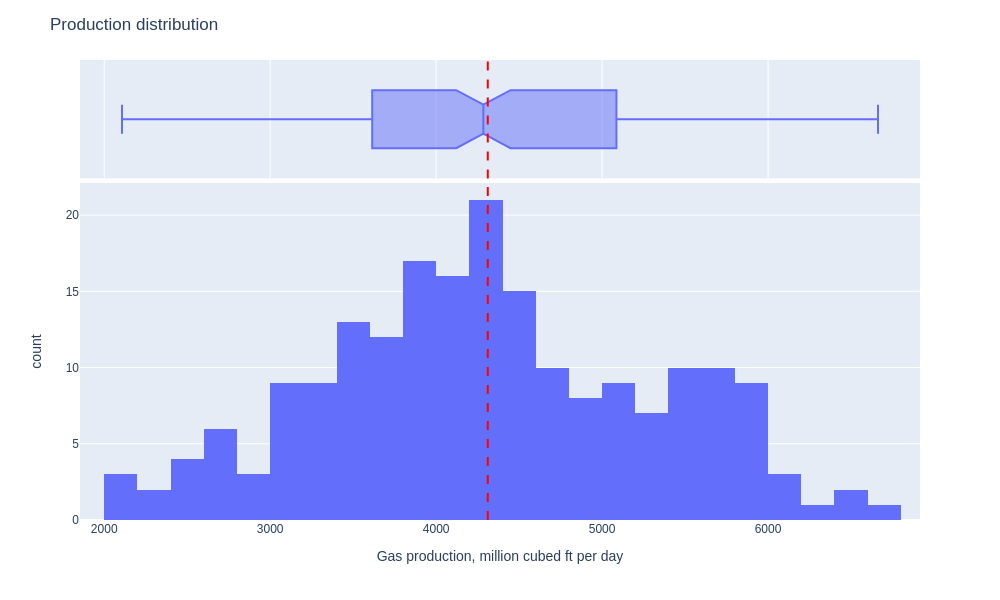

In [35]:
fig_prod_hist = px.histogram(
    data['Prod'],
    nbins=40,
    marginal='box'
)

fig_prod_hist.update_layout(
    autosize=False,
    width=1000,
    height=600,
    showlegend=False,
    title_text="Production distribution"
)

fig_prod_hist.add_vline(data['Prod'].mean(), line_width=2, line_dash="dash", line_color="red")
fig_prod_hist.layout.xaxis.title='Gas production, million cubed ft per day'
fig_prod_hist.write_image('images/target_hist.png')
fig_prod_hist.show('png')

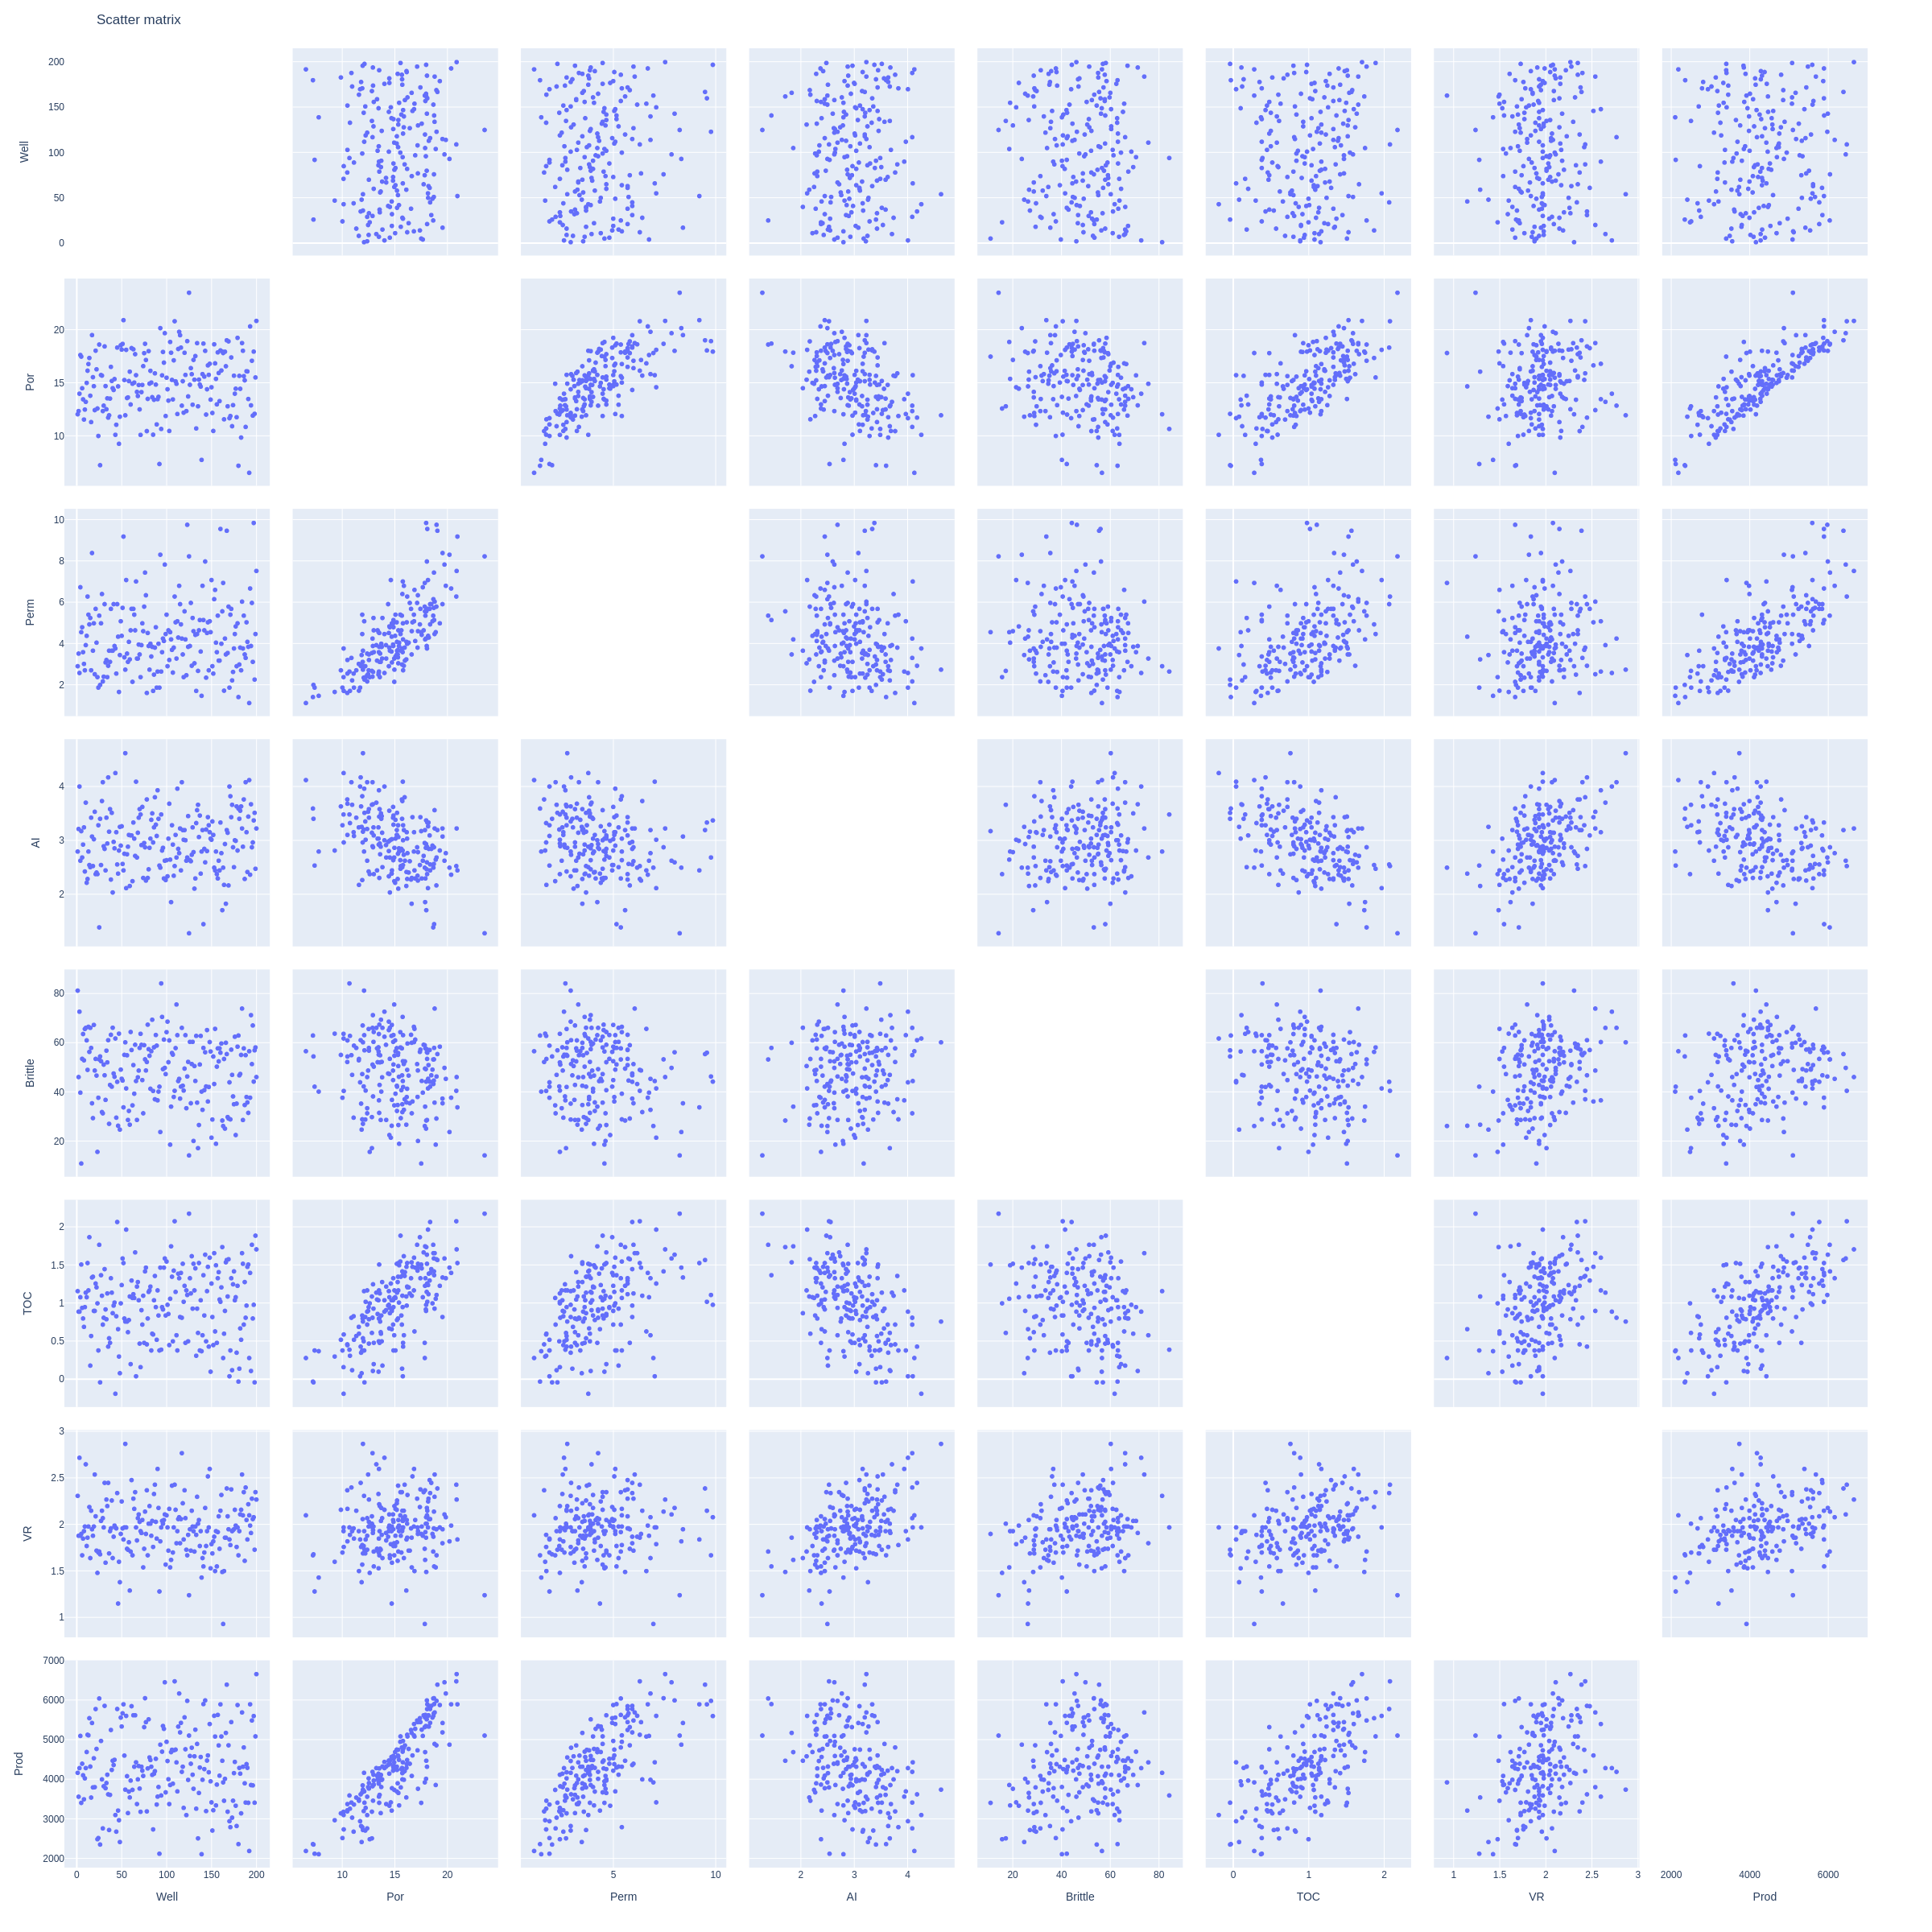

In [36]:
pd.DataFrame.iteritems = pd.DataFrame.items

fig_scatter = px.scatter_matrix(data)
fig_scatter.update_layout(
    autosize=False,
    width=300 * data.shape[1],
    height=300 * data.shape[1],
    showlegend=True,
    title_text="Scatter matrix"
)
fig_scatter.update_traces(diagonal_visible=False)
fig_scatter.write_image('images/scatter_matrix.png')
fig_scatter.show('png')

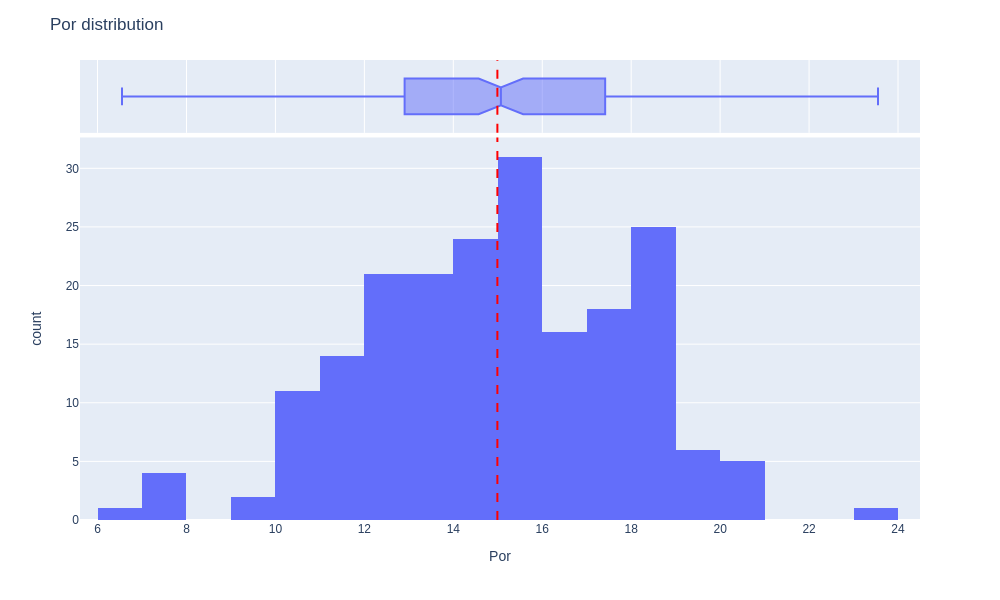

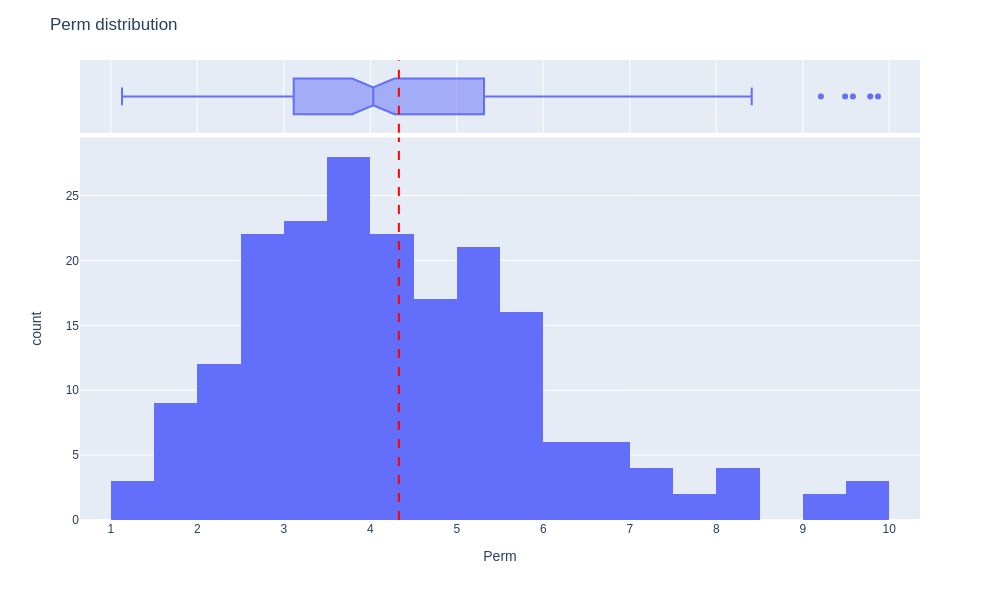

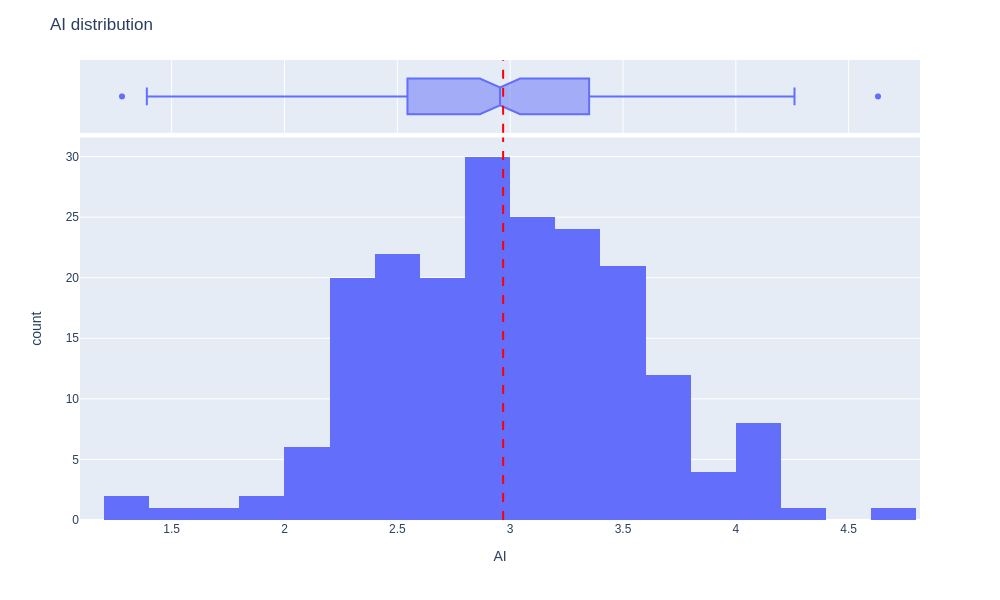

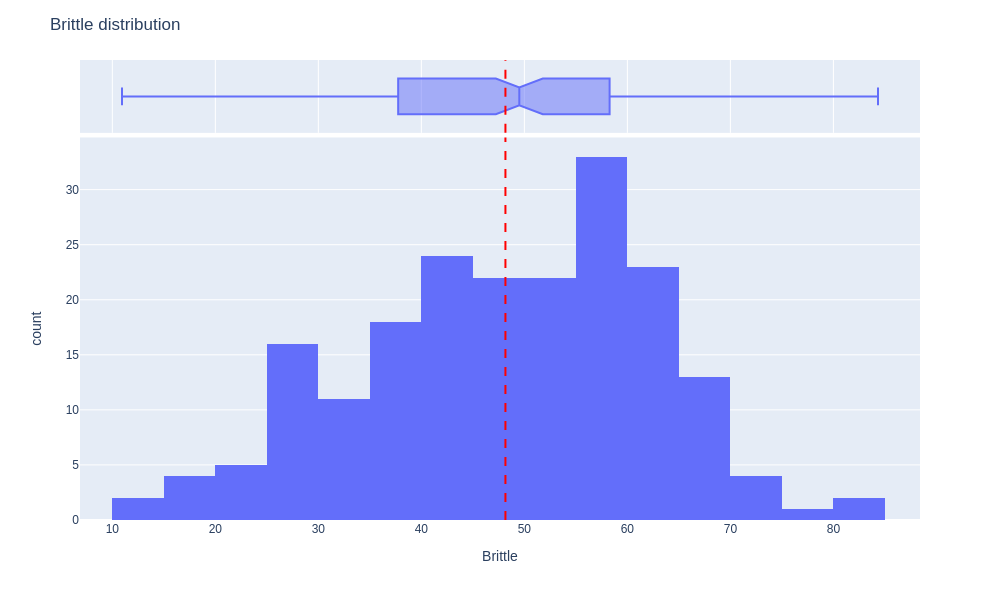

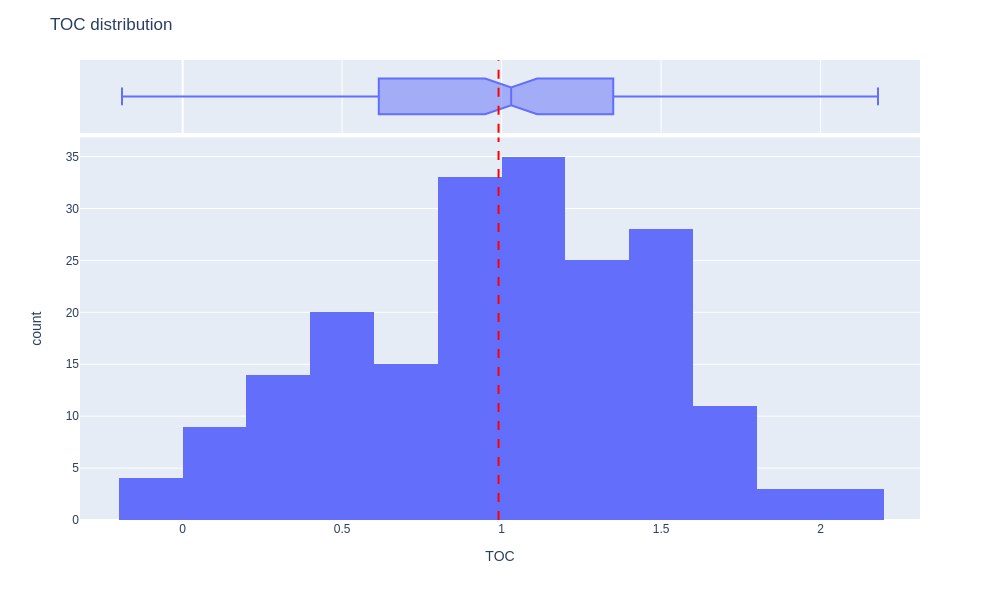

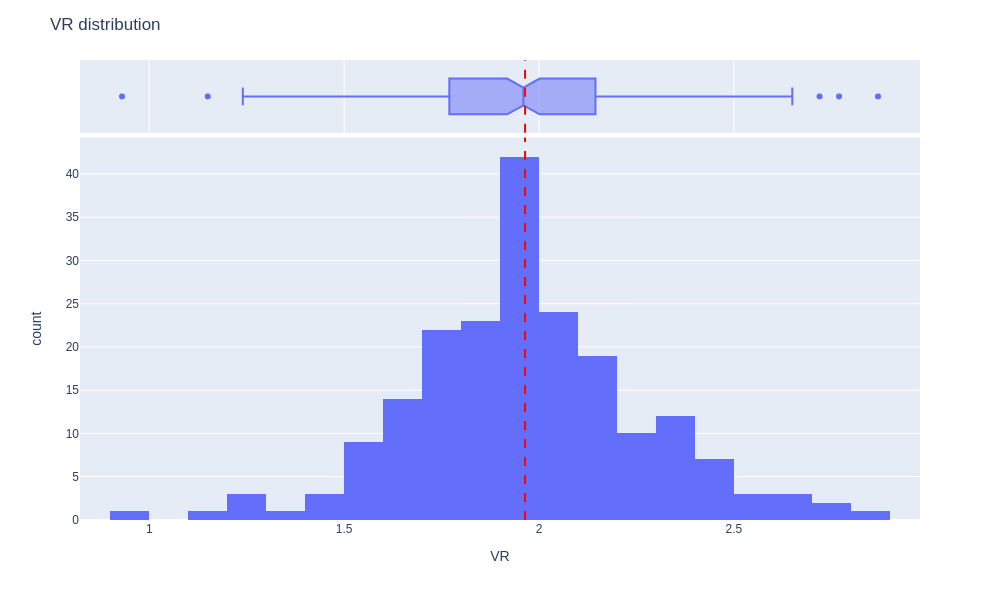

In [37]:
factor_list = list(data.columns)
factor_list.remove('Prod')
factor_list.remove('Well')

for feat in factor_list:
    fig_factor_hist = px.histogram(data,
                   x=feat,
                   marginal='box')
    fig_factor_hist.add_vline(data[feat].mean(), line_width=2, line_dash="dash", line_color="red")
    fig_factor_hist.update_layout(
        autosize=False, 
        width=1000, 
        height=600,
        title_text=f"{feat} distribution")
    fig_factor_hist.write_image(f'images/{feat}_hist.png')
    fig_factor_hist.show('png')

> *The data has no missing values. The distributions of all features except 'Well' and 'Perm' resemble normal distribution. 'Perm' distribution may be considered as lognormal. Apparently, 'Well' has absolutely no effect on target, and won't be accounted in further calculations. Few number of outliers can indicate that the data has been already prepared. There are distinct correlations between 'Perm', 'Por' and 'TOC', which further may affect linear regression model. Target feature correlates with 'Por', 'Perm' and 'TOC'.*

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

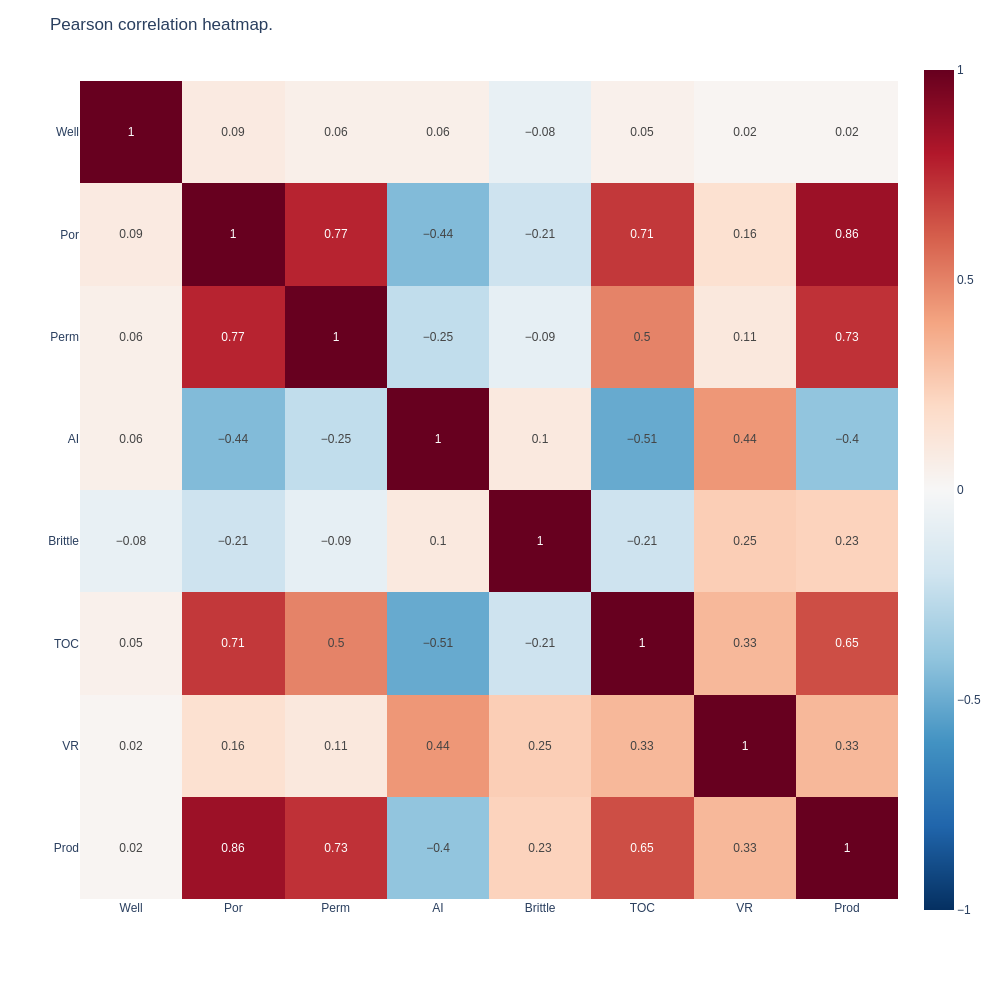

In [38]:
fig_corr = px.imshow(
    round(data.corr(method='spearman'), 2),
    text_auto=True,
    range_color=[-1, 1],
    color_continuous_scale=px.colors.sequential.RdBu_r)

fig_corr.update_layout(
        autosize=False, 
        width=1000, 
        height=1000,
        title_text="Pearson correlation heatmap.")
fig_corr.write_image('images/corr.png')
fig_corr.show('png')

In [39]:
corr_matrix = np.array(data.corr())
print(f'Correlation matrix rank: {np.linalg.matrix_rank(corr_matrix)}')
print(f'Correlation matrix determinant: {np.linalg.det(corr_matrix)}')

Correlation matrix rank: 8
Correlation matrix determinant: 0.0007299388072652082


> *The rank of the matrix equals to the number of columns. This means there's no collinearity in our case and determinant isn't equal to zero. However, the determinant itself is close to zero i.e. correlation matrix is ill-conditioned which is the evidence of multicollinearity or huge difference between units of features. There will be poor choice to pass this set of features to linear regression model.*

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [40]:
X = np.array(data.drop('Prod', axis=1))
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

y = np.array(data['Prod']).reshape(-1, 1)

w = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'Weights: {np.round(w.T)}')

Weights: [[-1232.     0.   230.   116.  -365.    25.   -78.   785.]]


> *Estimation of vector of weights shows that 'Well' factor has zero effect on the target. The model indicates that increasing 'Por' by 1% augments 'Prod' by 230 million ft cubed, increasing 'Brittle by 1% augments 'Prod' by 25 million ft cubed. Note that this interpretation should be trusted with caution, because correlation matrix is ill-conditioned.*

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [41]:
well_n106 = np.array([1, 106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
y_pred_n106 = well_n106 @ w
print(f'Prediction: {y_pred_n106[0]}')

MAE_n106 = np.abs(y_pred_n106 - 4748.315024)
print(f'MAE of prediction: {MAE_n106[0]}')

Prediction: 4723.064053707107
MAE of prediction: 25.250970292893726


In [42]:
def mape_calc(y, y_pred):
    """Calculate MAPE in percent

    Args:
        y (numpy.ndarray): vector of true values
        y_pred (numpy.ndarray): vector of predicted values

    Returns:
        float: MAPE value in percent
    """
    
    return np.sum(np.abs(y - y_pred) / np.abs(y)) / y.shape[0] * 100

In [43]:
y_pred_original = X @ w
MAPE_original = mape_calc(y, y_pred_original)
print(f'MAPE: {MAPE_original: .3f} %')

MAPE:  3.628 %


> *The error of the model is $3.628\%$ in average.*

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [44]:
weights_analysis_df = pd.DataFrame({'Feature': data.drop('Prod', axis=1).columns,
                                    'Correlation': corr_matrix[-1, :-1],
                                    'Weights': w[1:, 0]})
weights_analysis_df

,Feature,Correlation,Weights
0,Well,0.026817,0.050700
1,Por,0.861910,230.179140
2,Perm,0.727426,116.239006
3,AI,-0.390835,-365.202301
4,Brittle,0.237155,24.994370
5,TOC,0.654445,-78.400929
6,VR,0.323182,785.259815


> *'TOC' feature has positive moderate correlation ratio with the target. Despite this, the estimated weight of 'TOC' is negative. Such contradiction is result of ill-conditioned correlation matrix caused by multicollinearity.*

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [45]:
feats_to_drop = ['Well', 'Perm', 'TOC', 'Prod']

X_selected = np.array(data.drop(feats_to_drop, axis=1))
X_selected = np.hstack([np.ones(X_selected.shape[0]).reshape(-1, 1), X_selected])

y = np.array(data['Prod']).reshape(-1, 1)

w_selected = np.linalg.inv(X_selected.T @ X_selected) @ X_selected.T @ y
print(f'Weights, feature selection: {np.round(w_selected.T)}')

Weights, feature selection: [[-1835.   293.  -200.    28.   517.]]


In [46]:
y_pred_selected = X_selected @ w_selected
MAPE_selected = mape_calc(y, y_pred_selected)
print(f'MAPE after feature selection: {MAPE_selected: .3f} %')

MAPE after feature selection:  4.044 %


In [47]:
w_preselect_df = pd.concat([weights_analysis_df.drop('Correlation', axis=1), 
                            pd.DataFrame({'Feature': ['Intercept'], 'Weights': [w[0, 0]]})])

w_select_df = pd.DataFrame({'Feature': data.drop(feats_to_drop, axis=1).columns,
                            'Weights after selection': w_selected[1:, 0]})

w_select_df = pd.concat([w_select_df,
                         pd.DataFrame({'Feature': ['Intercept'], 'Weights after selection': [w_selected[0, 0]]})])

w_ols_df = w_preselect_df.merge(w_select_df, how='left', on='Feature')
w_ols_df

,Feature,Weights,Weights after selection
0,Well,0.050700,NaN
1,Por,230.179140,293.036246
2,Perm,116.239006,NaN
3,AI,-365.202301,-200.030912
4,Brittle,24.994370,27.640982
5,TOC,-78.400929,NaN
6,VR,785.259815,517.402726
7,Intercept,-1232.308030,-1835.446461


In [48]:
metrics_df = pd.DataFrame({'Model': ['Original', 'Selection'],
                           'MAPE, %': [MAPE_original, MAPE_selected]})
metrics_df

,Model,"MAPE, %"
0,Original,3.627947
1,Selection,4.044138


> *Increasing 'Por' by $1\%$ augments target by $293.06$ million ft cubed, increasing 'Brittle' by $1\%$ augments the target by $27.64$ million ft cubed. Both features have larger weights in new model compared to the model with all features. There's contradiction between sign of weights and correlation ratios this time. Removing multicollinear features solved that problem. However, MAPE dropped by $0.4\%$.*

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [49]:
from sklearn import linear_model

lr = linear_model.LinearRegression(fit_intercept=False)
lr.fit(X_selected, y)

w_sklearn_df = pd.DataFrame({'Feature': data.drop(feats_to_drop, axis=1).columns, 
                             'Weights sklearn': lr.coef_[0, 1:]})
w_sklearn_df = pd.concat([w_sklearn_df,
                          pd.DataFrame({'Feature': ['Intercept'], 'Weights sklearn': lr.coef_[0, 0]})])

w_ols_comparison_df = w_ols_df.merge(w_sklearn_df, how='left', on='Feature')
w_ols_comparison_df

,Feature,Weights,Weights after selection,Weights sklearn
0,Well,0.050700,NaN,NaN
1,Por,230.179140,293.036246,293.036246
2,Perm,116.239006,NaN,NaN
3,AI,-365.202301,-200.030912,-200.030912
4,Brittle,24.994370,27.640982,27.640982
5,TOC,-78.400929,NaN,NaN
6,VR,785.259815,517.402726,517.402726
7,Intercept,-1232.308030,-1835.446461,-1835.446461


In [50]:
y_pred_sklearn = lr.predict(X_selected)
MAPE_sklearn = mape_calc(y, y_pred_sklearn)

metrics_comparison_df = pd.DataFrame({'Model': ['Original', 'Selection', 'sklearn'],
                                      'MAPE, %': [MAPE_original, MAPE_selected, MAPE_sklearn]})
metrics_comparison_df

,Model,"MAPE, %"
0,Original,3.627947
1,Selection,4.044138
2,sklearn,4.044138


> *The predictions obtained via manual calculation and sklearn are completely identical. Sklearn uses the same formula we did.*

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [51]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandardScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [52]:
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(np.array(data.drop(feats_to_drop, axis=1)))

poly = PolynomialFeatures(degree=3, include_bias=False)
X_std = poly.fit_transform(X_std)
print(f'Number of polynomial features: {X_std.shape[1]}')

Number of polynomial features: 34


In [53]:
lr = LinearRegression()
cv_poly = cross_validate(lr, X_std, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print(f"Train sample MAPE: {-cv_poly['train_score'].mean() * 100:.3f} %")
print(f"Validation folds MAPE: {-cv_poly['test_score'].mean() * 100:.3f} %")

Train sample MAPE: 1.773 %
Validation folds MAPE: 2.681 %


> *MAPE calculated on train sample is $1.773\%$ which is more than twice better than that of the model without polynomial features. This means that new model better describes dependances in data. However, MAPE obtained on validation folds is $1.5$ worse. Such result is the sign of model's overfitting.*

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [54]:
lasso_poly = Lasso(max_iter=10000)

gs_lasso = GridSearchCV(
    scoring='neg_mean_absolute_percentage_error',
    estimator=lasso_poly, 
    param_grid={'alpha': np.linspace(0.1, 10, 100)}, 
    cv=5, 
    n_jobs=-1
)

gs_lasso.fit(X_std, y)
best_alpha_lasso = gs_lasso.best_params_['alpha']
print(f"Lasso, best alpha: {best_alpha_lasso}")

lasso_best_model = Lasso(alpha=best_alpha_lasso, max_iter=10000)
cv_lasso = cross_validate(lasso_best_model, X_std, y, scoring='neg_mean_absolute_percentage_error', 
                          cv=5, return_train_score=True)
print(f"Train sample MAPE, Lasso: {-cv_lasso['train_score'].mean() * 100:.3f} %")
print(f"Validation folds MAPE, Lasso: {-cv_lasso['test_score'].mean() * 100:.3f} %")

Lasso, best alpha: 4.6
Train sample MAPE, Lasso: 1.821 %
Validation folds MAPE, Lasso: 2.276 %


In [55]:
mape_lasso_df = pd.DataFrame({'Regularization': ['None', 'Lasso'],
                              'MAPE, train sample, %': [np.round(-cv_poly['train_score'].mean() * 100, 3), 
                                                        np.round(-cv_lasso['train_score'].mean() * 100, 3)],
                              'MAPE, validation folds, %': [np.round(-cv_poly['test_score'].mean() * 100, 3), 
                                                            np.round(-cv_lasso['test_score'].mean() * 100, 3)]})
mape_lasso_df

,Regularization,"MAPE, train sample, %","MAPE, validation folds, %"
0,None,1.773,2.681
1,Lasso,1.821,2.276


> *The effects of Lasso regularization is increasing MAPE by $0.05\%$ on train sample and decreasing MAPE on validation folds by $0.4\%$. This is the very goal of regularization operation: seeking pseudomininum of loss function instead of true minimum, therefore obtaining slightly worse results on training data and avoiding overfitting.*

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [56]:
ridge_poly = Ridge(max_iter=10000)

gs_ridge = GridSearchCV(
    scoring='neg_mean_absolute_percentage_error',
    estimator=ridge_poly,
    param_grid={'alpha': np.linspace(0.1, 10, 100)}, 
    cv=5, 
    n_jobs=-1
)

gs_ridge.fit(X_std, y)
best_alpha_ridge = gs_ridge.best_params_['alpha']
print(f"Ridge, best alpha: {best_alpha_ridge}")

ridge_best_model = Ridge(alpha=best_alpha_ridge, max_iter=10000)
cv_ridge = cross_validate(ridge_best_model, X_std, y, scoring='neg_mean_absolute_percentage_error', 
                          cv=5, return_train_score=True)
print(f"Train sample MAPE, Ridge: {-cv_ridge['train_score'].mean() * 100:.3f} %")
print(f"Validation folds MAPE, Ridge: {-cv_ridge['test_score'].mean() * 100:.3f} %")

Ridge, best alpha: 0.2
Train sample MAPE, Ridge: 1.774 %
Validation folds MAPE, Ridge: 2.672 %


In [57]:
mape_ridge_df = pd.DataFrame({'Regularization': ['None', 'Lasso', 'Ridge'],
                              'MAPE, train sample, %': [np.round(-cv_poly['train_score'].mean() * 100, 3), 
                                                        np.round(-cv_lasso['train_score'].mean() * 100, 3),
                                                        np.round(-cv_ridge['train_score'].mean() * 100, 3)],
                              'MAPE, validation folds, %': [np.round(-cv_poly['test_score'].mean() * 100, 3), 
                                                            np.round(-cv_lasso['test_score'].mean() * 100, 3),
                                                            np.round(-cv_ridge['test_score'].mean() * 100, 3)]})
mape_ridge_df

,Regularization,"MAPE, train sample, %","MAPE, validation folds, %"
0,None,1.773,2.681
1,Lasso,1.821,2.276
2,Ridge,1.774,2.672


> *The effect of Ridge regularization is less compared to Lasso. MAPE on validation folds was improved only by $0.01\%$*

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [58]:
elastic_poly = ElasticNet(max_iter=10000)

gs_elastic = GridSearchCV(
    scoring='neg_mean_absolute_percentage_error',
    estimator=elastic_poly, 
    param_grid={'alpha': np.linspace(0.1, 10, 100),
                'l1_ratio': np.linspace(0.1, 1, 20)}, 
    cv=5, 
    n_jobs=-1
)

gs_elastic.fit(X_std, y)
best_alpha_elastic = gs_elastic.best_params_['alpha']
best_l1_elastic = gs_elastic.best_params_['l1_ratio']
print(f"Elastic net, best alpha: {best_alpha_elastic}")
print(f"Elastic net, best l1_ratio: {best_l1_elastic}")

elastic_best_model = ElasticNet(alpha=best_alpha_elastic, l1_ratio=best_l1_elastic, max_iter=10000)
cv_elastic = cross_validate(elastic_best_model, X_std, y, scoring='neg_mean_absolute_percentage_error', 
                            cv=5, return_train_score=True)
print(f"Train sample MAPE, Elastic net: {-cv_elastic['train_score'].mean() * 100:.3f} %")
print(f"Validation folds MAPE, Elastic net: {-cv_elastic['test_score'].mean() * 100:.3f} %")

Elastic net, best alpha: 4.6
Elastic net, best l1_ratio: 1.0
Train sample MAPE, Elastic net: 1.821 %
Validation folds MAPE, Elastic net: 2.276 %


In [59]:
mape_elastic_df = pd.DataFrame({'Regularization': ['None', 'Lasso', 'Ridge', 'Elastic net'],
                              'MAPE, train sample, %': [np.round(-cv_poly['train_score'].mean() * 100, 3), 
                                                        np.round(-cv_lasso['train_score'].mean() * 100, 3),
                                                        np.round(-cv_ridge['train_score'].mean() * 100, 3),
                                                        np.round(-cv_elastic['train_score'].mean() * 100, 3)],
                              'MAPE, validation folds, %': [np.round(-cv_poly['test_score'].mean() * 100, 3), 
                                                            np.round(-cv_lasso['test_score'].mean() * 100, 3),
                                                            np.round(-cv_ridge['test_score'].mean() * 100, 3),
                                                            np.round(-cv_elastic['test_score'].mean() * 100, 3)]})
mape_elastic_df

,Regularization,"MAPE, train sample, %","MAPE, validation folds, %"
0,None,1.773,2.681
1,Lasso,1.821,2.276
2,Ridge,1.774,2.672
3,Elastic net,1.821,2.276


> *Elastic net regularization is a combination of Lasso and Ridge methods. The best result obtained when alpha = 4.6 and l1_ratio = 1 which corresponds to Lasso regularization parameters. MAPE, therefore, is completely identical to that of Lasso.*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [60]:
final_df = pd.DataFrame({'Model': ['OLS, all features', 'OLS, selected features', 'OLS, sklearn', 
                                   'sklearn, poly features', 'sklearn, Lasso', 'sklearn, Ridge', 'sklearn, Elastic net'],
                         'Hyperparameters': [None, None, None, None, 'alpha = 4.6', 'alpha = 0.2', 
                                             'alpha = 4.6, l1_ratio = 1'],
                         'Polynomial features': [False, False, False, True, True, True, True],
                         'MAPE, train sample, %': [np.round(MAPE_original, 3), 
                                                   np.round(MAPE_selected, 3),
                                                   np.round(MAPE_sklearn, 3),
                                                   np.round(-cv_poly['train_score'].mean() * 100, 3),
                                                   np.round(-cv_lasso['train_score'].mean() * 100, 3),
                                                   np.round(-cv_ridge['train_score'].mean() * 100, 3),
                                                   np.round(-cv_elastic['train_score'].mean() * 100, 3)],
                         'MAPE, validation folds, %': [None,
                                                       None,
                                                       None,
                                                       np.round(-cv_poly['test_score'].mean() * 100, 3),
                                                       np.round(-cv_lasso['test_score'].mean() * 100, 3),
                                                       np.round(-cv_ridge['test_score'].mean() * 100, 3),
                                                       np.round(-cv_elastic['test_score'].mean() * 100, 3)]})
final_df

,Model,Hyperparameters,Polynomial features,"MAPE, train sample, %","MAPE, validation folds, %"
0,"OLS, all features",None,False,3.628,NaN
1,"OLS, selected features",None,False,4.044,NaN
2,"OLS, sklearn",None,False,4.044,NaN
3,"sklearn, poly features",None,True,1.773,2.681
4,"sklearn, Lasso",alpha = 4.6,True,1.821,2.276
5,"sklearn, Ridge",alpha = 0.2,True,1.774,2.672
6,"sklearn, Elastic net","alpha = 4.6, l1_ratio = 1",True,1.821,2.276


> *The best result so far was demonstrated by the models with polynomial features where Lasso and Elastic net regularization were applied. Lasso has fewer hyperparameters and in our case Elastic net is basically identical to Lasso, so Lasso regularization is the best choice. The models with polynomial features achieves better results because they have superior ability to describe dependancies in data. However, when implementing such models, regularization is mandatory in order to avoid overfitting.*